<ul type="none">
  <li> Author: Andy Chiv, Shannon Weng </li>
  <li> Course: GSB 521-01 </li>
  <li> Date: March 9, 2023 </li>
</ul>

# Recommendation on the Optimal Disneyland Plan for Shorter Waiting Time in 1 Day

# Step 1: Introduction

For this project, my team is interested in understanding wait time trends for various attractions at Disneyland theme park in California. In 2022,  Disneyland attracted as many as [18 million visitors](https://mickeyvisit.com/disneyland-busy-times-when-to-visit/#:~:text=Below%20see%20the%20complete%20Disneyland,those%20visitors%20create%20as%20possible.), the second most visited theme park after Disney World. With thousands of visitors flocking into the park every day, Disneyland's average wait times have also increased after the introduction of paid [Genie+ Program](https://www.disneydining.com/wait-times-have-increased-and-genie-is-to-blame-jb1/#:~:text=The%20reality%20is%2C%20wait%20times,in%20the%20same%20time%20frame.) in 2021, allowing visitors to virtually skip the lines. In fact, the monthly average attraction wait time in 2019 was 25 minutes, while in 2022, it was 30 minutes, reported by [KTLA](https://ktla.com/news/california/disneylands-attraction-wait-times-have-been-longer-since-genie-launched-data-shows/#:~:text=In%202019%2C%20the%20monthly%20average,wait%20times%20was%2021%20minutes.). However, not many customers are enrolled in Genie+ program since it is a paid service. Given a long wait time, the supposedly fun and pleasant experience may turn into a totally different experience if wait lines are too long.  Therefore, we would like to explore the potential optimal routes that reduce wait times compared the [conventional guide](https://nicolethenomad.com/2018/03/27/1-day-in-disneyland-the-best-route/).



Saving Conventional route 2.jpg to Conventional route 2.jpg


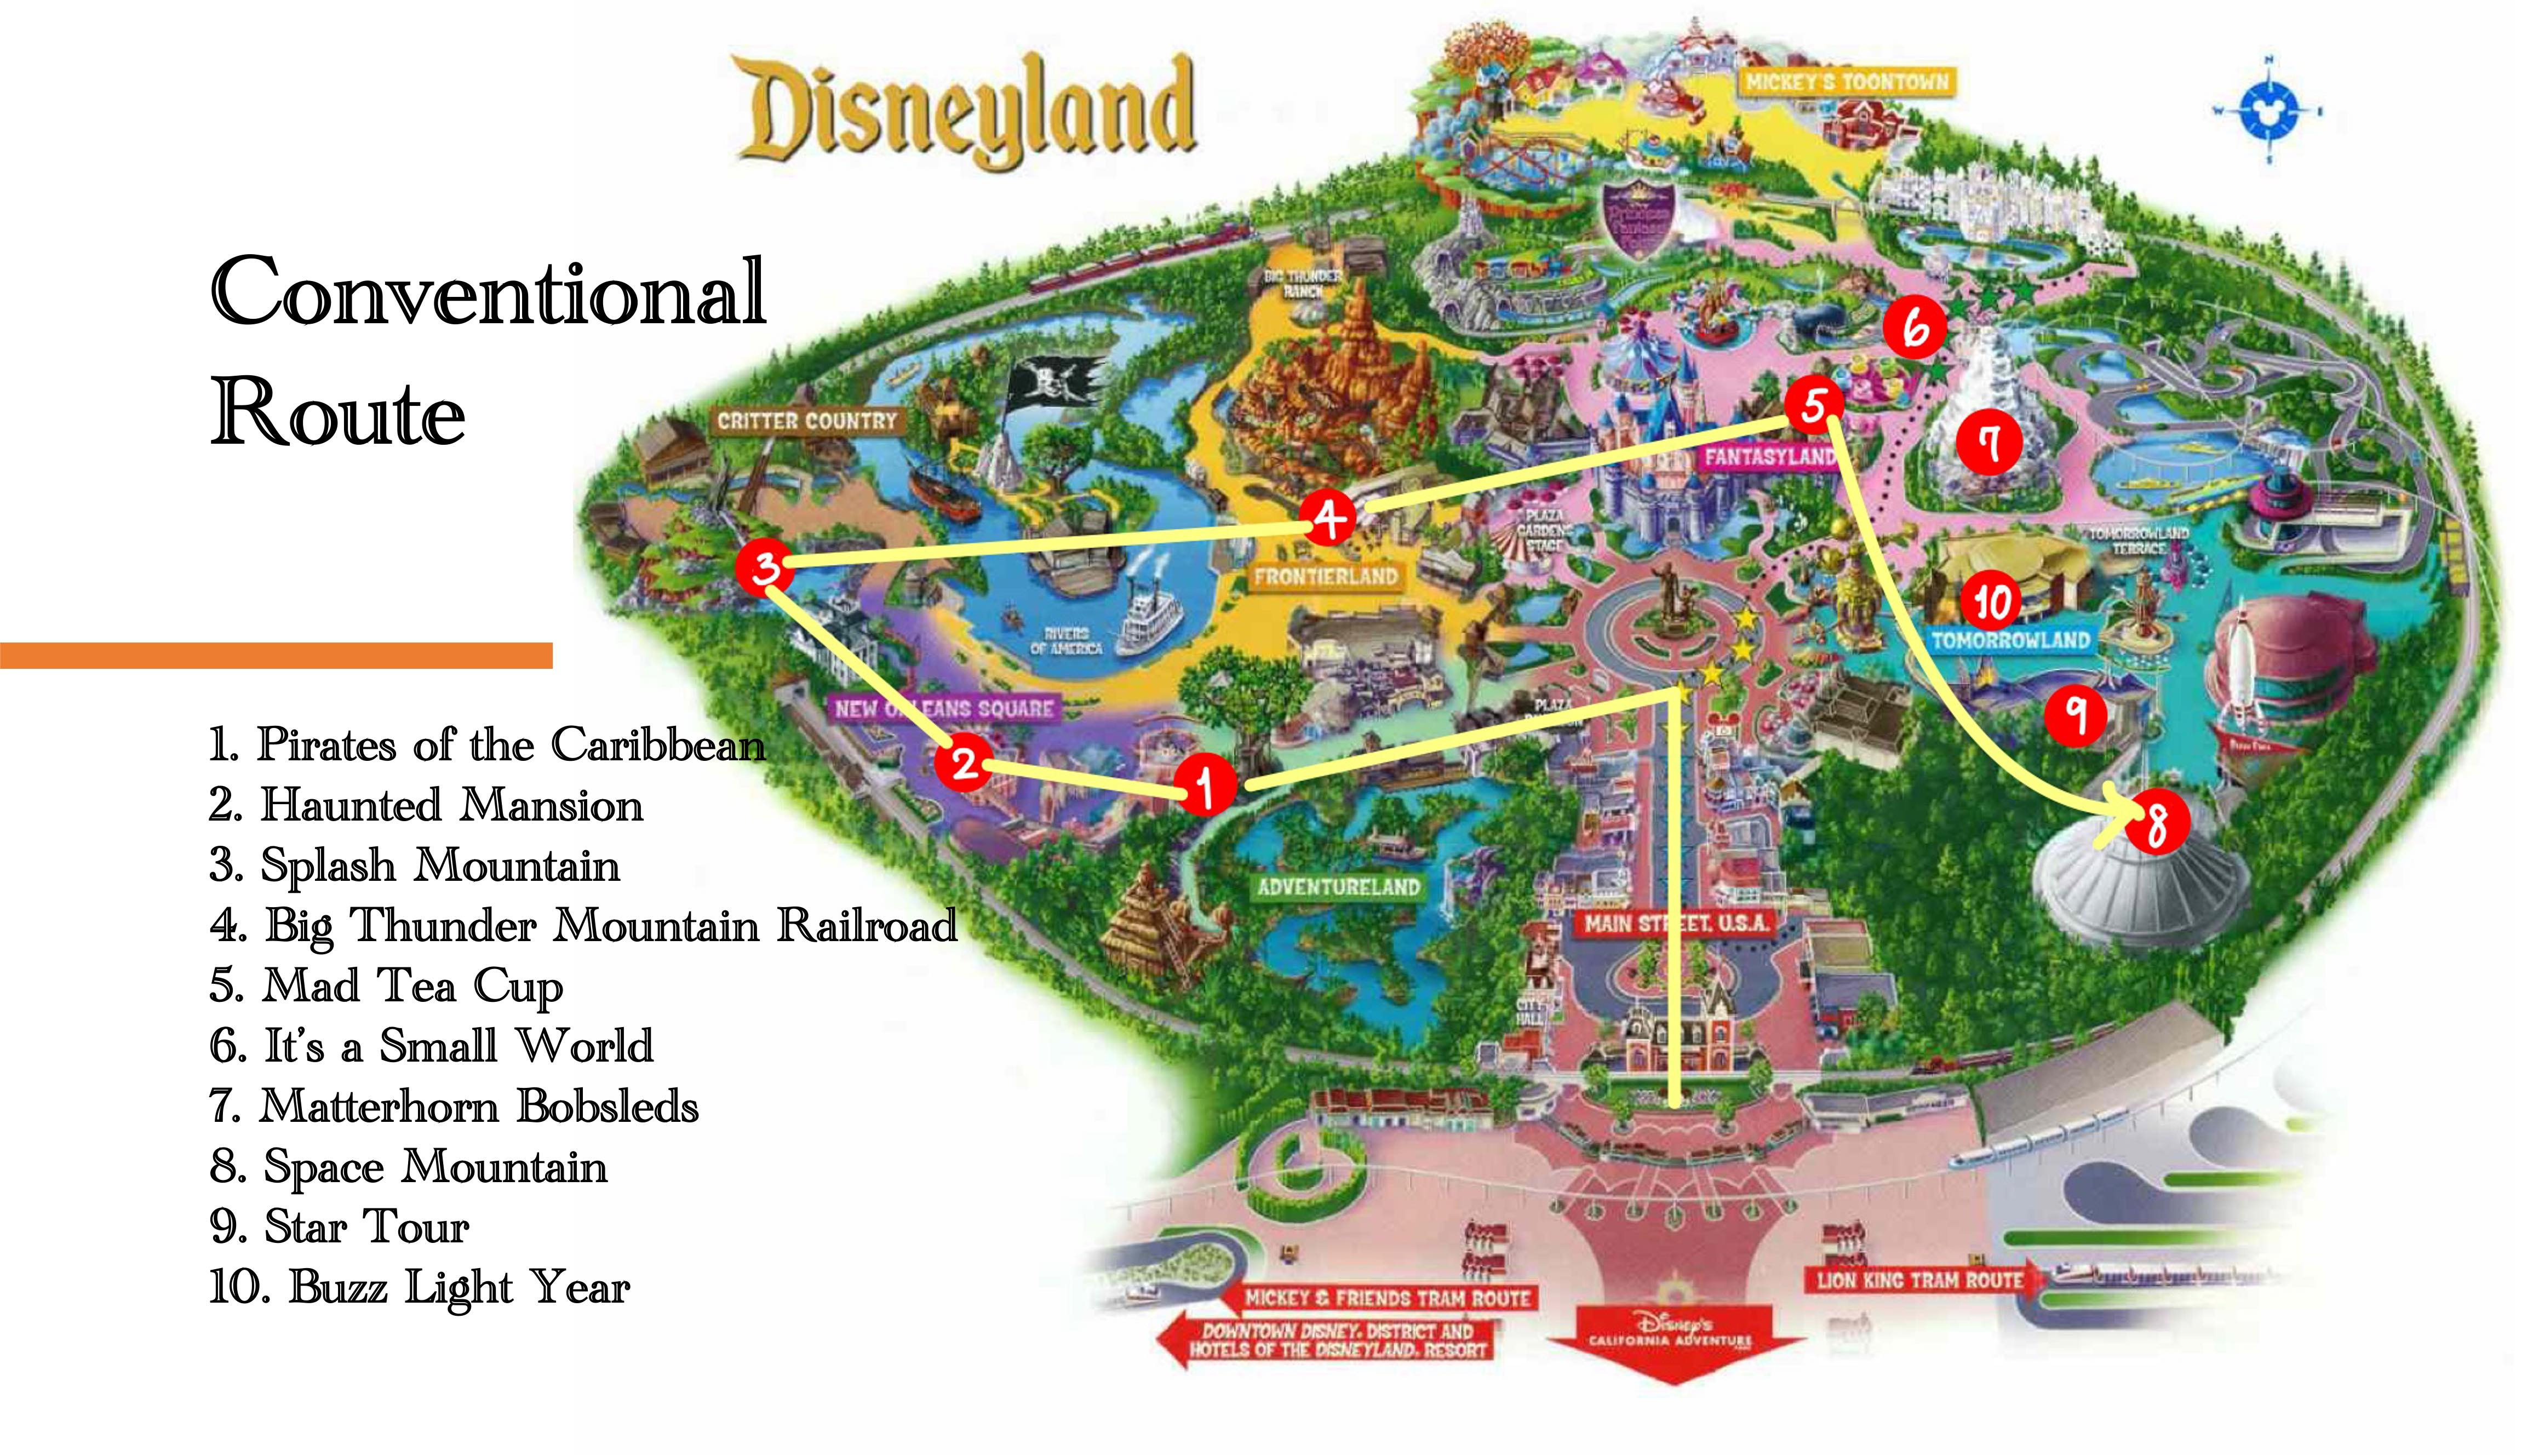

In [ ]:
# Demo for optimal Route 2
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('Conventional route 2.jpg')

#### Approach: 
In order to maximize visitors' time at Disneyland for a **one day** trip, we are considering the top 10 attractions given by www.thrill-data.com. It is also assumed that visitors can visit at least **6 attractions from 6 different lands in one day starting from 8AM to 12AM**. Knowing the average wait time for each ride at a given time, we will develope a model in finding the most optimal route based on time of the day to reduce wait time. 

#### The following are the top 10 attractions from 6 different lands: 
- **AdventureLand**: Pirate of Carribeans
- **New Orleans Square:** Haunted Mansion
- **Critter County:** Splash Mountain
- **Frontierland:** Big Thunder Mt.Railroad
- **Fantasyland:** Teacups, It's a Small World, Matterhorn
- **Tomorrowland:** Space Mountain, Star Tours, Buzz Lightyear Astro Blasters

#### Data Source:  
- Historical data for major popular attractions are pulled from www.thrill-data.com where average wait times are calculated directly from the theme park apps and user reporting in 2022. 


# Step 2: Hypothesis

Our hypothesis is that a large number of Disneyland visitors enter the park by using the standard or conventional map guide, leading to a potential increase in wait times for popular rides if everyone follows the same route and visits at the same time. We believe that if this is the case, many visitors will queue up for the same rides simultaneously, causing a significant delay in wait times. We hypothesize as the following: 

- **Ho: The new Disney planning guide does not reduces wait times more effectively than the conventional guide.**
- **Ha: The new Disney planning guide reduces wait times more effectively than the conventional guide.**

# Step 3: Data Extraction & Wrangling

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime
import warnings

# Filter out the "UserWarning: your message here" warning
warnings.filterwarnings("ignore", message="your message here")

## Loading data

The data provided by www.thrill-data.com includes the average wait time for top 10 popular rides from January to December in 2022. For convenience and future accessibility, the data has been downloaded and stored in one of our [personal github repositories](https://github.com/andychiv/disneyland_analysis/tree/main/Rides). 

In [ ]:
# Populate the link for each ride dataframe
url1 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Big%20Thunder%20Mt.Railroad.csv"
url2 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Buzz%20Lightyear%20Astro%20Blasters.csv"
url3 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Haunted%20Mansion.csv"
url4 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/It%E2%80%99s%20a%20Small%20World.csv"
url5 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Mad%20Tea%20Party.csv"
url6 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Matterhorn%20Bobsleds.csv"
url7 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Pirates%20of%20the%20Carribean.csv"
url8 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Space%20Mountain.csv"
url9 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Splash%20Mountain.csv"
url10 = "https://raw.githubusercontent.com/andychiv/disneyland_analysis/main/Rides/Star%20Tours.csv"

# Store all url links into a list
my_link = [url1, url2, url3, url4, url5, url6, url7, url8, url9, url10]

In [ ]:
# This function will read multiple csv files stored in Github
def read_multi_csv(list_of_link):

  # create an empty dataset
  myData = pd.DataFrame()
  for link in list_of_link:
    temp = pd.read_csv(link)
    myData = myData.append(temp)
  return myData

# Execute read_multi_csv function and store every dataframe into a single dataframe
data0 = read_multi_csv(my_link)
data0

,Ride,Date.Time,Wait.Time
0,Big Thunder Mountain Railroad,2022-01-01 08:05:22,5
1,Big Thunder Mountain Railroad,2022-01-01 08:10:22,5
2,Big Thunder Mountain Railroad,2022-01-01 08:15:23,5
3,Big Thunder Mountain Railroad,2022-01-01 08:20:22,5
4,Big Thunder Mountain Railroad,2022-01-01 08:25:24,5
...,...,...,...
120101,Star Tours – The Adventures Continue,2023-01-01 00:35:06,10
120102,Star Tours – The Adventures Continue,2023-01-01 00:40:04,10
120103,Star Tours – The Adventures Continue,2023-01-01 00:45:08,10
120104,Star Tours – The Adventures Continue,2023-01-01 00:50:06,10


In [ ]:
# Verify the number of Ride: there are 10 rides as expected after we combine
data0['Ride'].unique()

array(['Big Thunder Mountain Railroad', 'Buzz Lightyear Astro Blasters',
       'Haunted Mansion', '"it\'s a small world"', 'Mad Tea Party',
       'Matterhorn Bobsleds', 'Pirates of the Caribbean',
       'Space Mountain', 'Splash Mountain',
       'Star Tours – The Adventures Continue'], dtype=object)

In [ ]:
# Convert Time to timeStamp
data0['timestamp'] = pd.to_datetime(data0['Date.Time'], format='%Y-%m-%d %H:%M:%S')

# extract date, time and hour_min components
data0['date'] = data0['timestamp'].dt.date
data0['time'] = data0['timestamp'].dt.time
data0["hour minute"] = data0['timestamp'].dt.strftime('%H:%M')

# Drop the Date.Time Column since we no longer need it
data1 = data0.drop(columns=["Date.Time"])
data1.tail()

,Ride,Wait.Time,timestamp,date,time,hour minute
120101,Star Tours – The Adventures Continue,10,2023-01-01 00:35:06,2023-01-01,00:35:06,00:35
120102,Star Tours – The Adventures Continue,10,2023-01-01 00:40:04,2023-01-01,00:40:04,00:40
120103,Star Tours – The Adventures Continue,10,2023-01-01 00:45:08,2023-01-01,00:45:08,00:45
120104,Star Tours – The Adventures Continue,10,2023-01-01 00:50:06,2023-01-01,00:50:06,00:50
120105,Star Tours – The Adventures Continue,10,2023-01-01 00:55:10,2023-01-01,00:55:10,00:55


### final filtered dataset

In [ ]:
# We are considering timestamp from 8AM to 12AM only, lets do some filtering timestamps between 8:00 AM and 12:00 AM
start_time = pd.to_datetime('08:00:00').time()
end_time = pd.to_datetime('23:59:59').time()
filtered_df = data1.loc[(data1['time'] >= start_time) & (data1['time'] <= end_time)]


# Remove 08:00, 08:01, 08:06 and 20:41 and 22:36 because they are not the time we want
filtered_df = filtered_df[filtered_df['hour minute'] != '08:01']
filtered_df = filtered_df[filtered_df['hour minute'] != '08:00']
filtered_df = filtered_df[filtered_df['hour minute'] != '08:06']
filtered_df = filtered_df[filtered_df['hour minute'] != '20:41']
filtered_df = filtered_df[filtered_df['hour minute'] != '22:36']

filtered_df

,Ride,Wait.Time,timestamp,date,time,hour minute
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,08:05
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22,08:10
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23,08:15
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22,08:20
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24,08:25
...,...,...,...,...,...,...
120089,Star Tours – The Adventures Continue,10,2022-12-31 23:35:05,2022-12-31,23:35:05,23:35
120090,Star Tours – The Adventures Continue,10,2022-12-31 23:40:09,2022-12-31,23:40:09,23:40
120091,Star Tours – The Adventures Continue,10,2022-12-31 23:45:06,2022-12-31,23:45:06,23:45
120092,Star Tours – The Adventures Continue,10,2022-12-31 23:50:05,2022-12-31,23:50:05,23:50


In [ ]:
from google.colab import drive
drive.mount('drive')

filtered_df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

Mounted at drive


### Calcuate the average wait time at 5 minutes interval for every ride 

In [ ]:
# Finding the average waiting time for 5 minute interval for every ride
grouped_df = filtered_df.groupby(['Ride', "hour minute"]).mean()
grouped_df = grouped_df.rename(columns={"Wait.Time": "average waiting time"})
grouped_df_reset = grouped_df.reset_index()
grouped_df_reset

,Ride,hour minute,average waiting time
0,"""it's a small world""",08:05,5.023810
1,"""it's a small world""",08:10,5.031609
2,"""it's a small world""",08:15,5.031700
3,"""it's a small world""",08:20,5.066667
4,"""it's a small world""",08:25,5.064426
...,...,...,...
1913,Star Tours – The Adventures Continue,23:35,9.133858
1914,Star Tours – The Adventures Continue,23:40,8.884514
1915,Star Tours – The Adventures Continue,23:45,8.556430
1916,Star Tours – The Adventures Continue,23:50,8.359580


In [ ]:
# Join the grouped_df_reset and filtered_df
merged_df = pd.merge(filtered_df, grouped_df_reset, on = ["Ride", "hour minute"])
merged_df

,Ride,Wait.Time,timestamp,date,time,hour minute,average waiting time
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,08:05,6.144495
1,Big Thunder Mountain Railroad,5,2022-01-02 08:05:22,2022-01-02,08:05:22,08:05,6.144495
2,Big Thunder Mountain Railroad,5,2022-01-03 08:05:23,2022-01-03,08:05:23,08:05,6.144495
3,Big Thunder Mountain Railroad,5,2022-01-04 08:05:22,2022-01-04,08:05:22,08:05,6.144495
4,Big Thunder Mountain Railroad,5,2022-01-05 08:05:22,2022-01-05,08:05:22,08:05,6.144495
...,...,...,...,...,...,...,...
971305,Star Tours – The Adventures Continue,5,2022-12-28 23:55:07,2022-12-28,23:55:07,23:55,8.263158
971306,Star Tours – The Adventures Continue,5,2022-12-29 23:55:07,2022-12-29,23:55:07,23:55,8.263158
971307,Star Tours – The Adventures Continue,5,2022-12-30 23:55:05,2022-12-30,23:55:05,23:55,8.263158
971308,Star Tours – The Adventures Continue,10,2022-12-31 23:55:04,2022-12-31,23:55:04,23:55,8.263158


# Step 4: Data Visualization

### Visualize the average wait time at 5 minutes interval for every ride 

In [ ]:
filtered_df

,Ride,Wait.Time,timestamp,date,time,hour minute
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,08:05
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22,08:10
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23,08:15
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22,08:20
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24,08:25
...,...,...,...,...,...,...
120089,Star Tours – The Adventures Continue,10,2022-12-31 23:35:05,2022-12-31,23:35:05,23:35
120090,Star Tours – The Adventures Continue,10,2022-12-31 23:40:09,2022-12-31,23:40:09,23:40
120091,Star Tours – The Adventures Continue,10,2022-12-31 23:45:06,2022-12-31,23:45:06,23:45
120092,Star Tours – The Adventures Continue,10,2022-12-31 23:50:05,2022-12-31,23:50:05,23:50


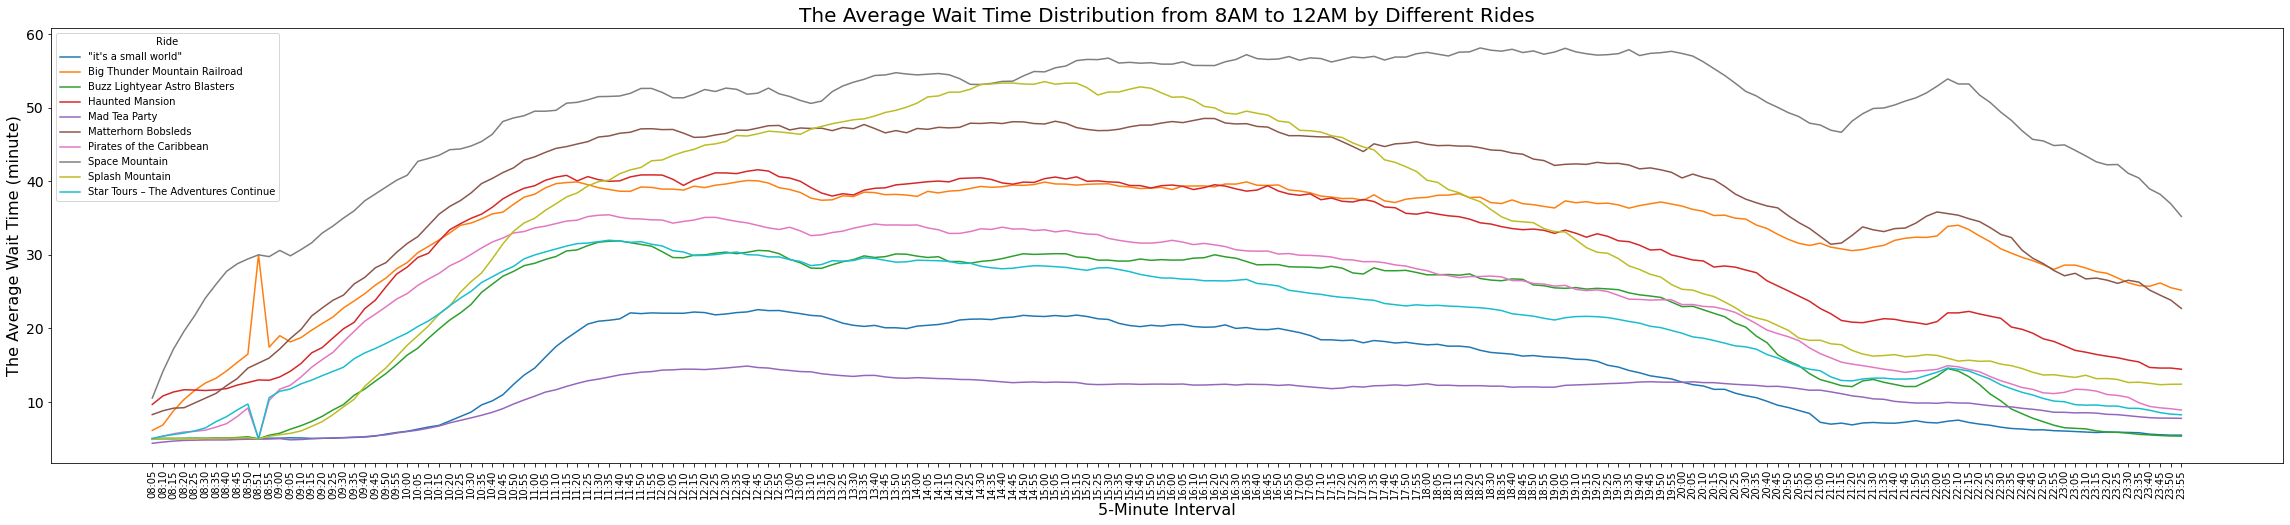

In [ ]:
# create a figure with a specific size
fig, ax = plt.subplots(figsize=(40, 8))
sns.lineplot(data=grouped_df_reset, x='hour minute', y='average waiting time', hue = "Ride", ax = ax)

ax.tick_params(axis='y', labelsize=14)
ax.set_title("The Average Wait Time Distribution from 8AM to 12AM by Different Rides", fontsize = 20)
ax.set_xlabel("5-Minute Interval", fontsize=16)
ax.set_ylabel("The Average Wait Time (minute)", fontsize=16)

plt.xticks(rotation=90)
plt.show()

### Calculate the average wait time at 5 minutes interval for all rides

In [ ]:
# Finding the average waiting time for 5 minute interval regardless of which ride
grouped_min_df = filtered_df.groupby(["hour minute"]).mean()
grouped_min_df = grouped_min_df.rename(columns={"Wait.Time": "average waiting time"})
grouped_min_df_reset = grouped_min_df.reset_index()

In [ ]:
# change "hour time" into timestamp
grouped_min_df_reset['timestamp'] = pd.to_datetime(grouped_min_df_reset['hour minute'])

# Bin the time
bins = [7, 9, 11, 14, 17, 20, 24]
labels = ['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']
grouped_min_df_reset['time group'] = pd.cut(grouped_min_df_reset['timestamp'].dt.hour, bins=bins, labels=labels, right = True)

# Remove the timestamp 
grouped_min_df_reset = grouped_min_df_reset.loc[:, grouped_min_df_reset.columns != 'timestamp']
grouped_min_df_reset

,hour minute,average waiting time,time group
0,08:05,6.165232,Early Morning
1,08:10,6.845412,Early Morning
2,08:15,7.497772,Early Morning
3,08:20,8.001328,Early Morning
4,08:25,8.450686,Early Morning
...,...,...,...
187,23:35,15.874524,Night
188,23:40,15.463515,Night
189,23:45,15.279239,Night
190,23:50,14.982884,Night


### Visualize the average wait time at 5 minutes interval for all rides

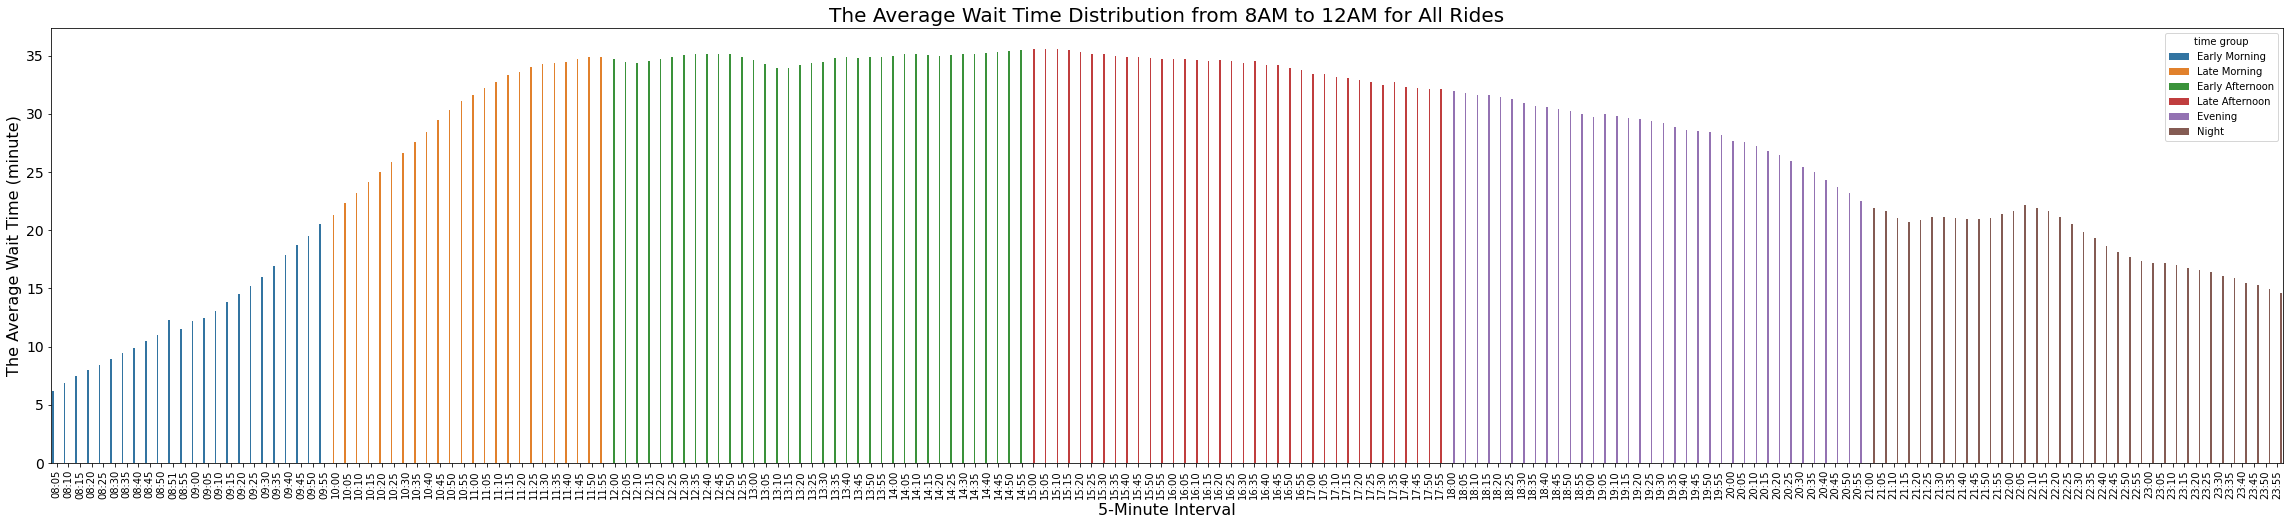

In [ ]:
# create a figure with a specific size
fig, ax = plt.subplots(figsize=(40, 8))
sns.barplot(data=grouped_min_df_reset, x='hour minute', y='average waiting time', hue = "time group", ax = ax)

ax.tick_params(axis='y', labelsize=14)
ax.set_title("The Average Wait Time Distribution from 8AM to 12AM for All Rides", fontsize = 20)
ax.set_xlabel("5-Minute Interval", fontsize=16)
ax.set_ylabel("The Average Wait Time (minute)", fontsize=16)

plt.xticks(rotation=90)
plt.show()

Disneyland's opening and closing hours may vary depending on the day, week, month, and season. However, as a general rule, the park usually opens at 8 AM and closes at 12 AM. For the purposes of our analysis, we will use these time intervals. Additionally, we will group the time intervals using the modality of the average wait time displayed above.

- **Early Morning**: 8AM - 10 AM
- **Late Morning**: 10AM - 12PM
- **Early Afternoon**: 12PM - 3PM
- **Later Afternoon**: 3PM - 6PM 
- **Evening**:     6PM - 9PM
- **Night**: 9PM - 12 AM

The distibution has an almost normal distribution with the average wait time ranging from 5 minute to 35 minutes. Between 10 AM and 12 PM, the majority of rides are expected to have wait times ranging from 20 to 35 minutes, so we will categorize them as late morning rather than early morning. The early and late afternoon time ranges from 12 PM to 3 PM and 3 PM to 6 PM, respectively, covering a total of six hours. This is a period when we expect to see a significant influx of crowds in the park. In addition, the distribution also shows a slight dip around 9 PM, which further supports the suitability of our chosen time group as Night rather than Evening. 

In [ ]:
# Define the bins and labels for time groups
bins = [7, 9, 11, 14, 17, 20, 24]
labels = ['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']

# Create a new column 'time group' in filtered_df based on timestamp hour
filtered_df.loc[:, 'time group'] = pd.cut(filtered_df['timestamp'].dt.hour, bins=bins, labels=labels, right=True)
filtered_df

,Ride,Wait.Time,timestamp,date,time,hour minute,time group
0,Big Thunder Mountain Railroad,5,2022-01-01 08:05:22,2022-01-01,08:05:22,08:05,Early Morning
1,Big Thunder Mountain Railroad,5,2022-01-01 08:10:22,2022-01-01,08:10:22,08:10,Early Morning
2,Big Thunder Mountain Railroad,5,2022-01-01 08:15:23,2022-01-01,08:15:23,08:15,Early Morning
3,Big Thunder Mountain Railroad,5,2022-01-01 08:20:22,2022-01-01,08:20:22,08:20,Early Morning
4,Big Thunder Mountain Railroad,5,2022-01-01 08:25:24,2022-01-01,08:25:24,08:25,Early Morning
...,...,...,...,...,...,...,...
120089,Star Tours – The Adventures Continue,10,2022-12-31 23:35:05,2022-12-31,23:35:05,23:35,Night
120090,Star Tours – The Adventures Continue,10,2022-12-31 23:40:09,2022-12-31,23:40:09,23:40,Night
120091,Star Tours – The Adventures Continue,10,2022-12-31 23:45:06,2022-12-31,23:45:06,23:45,Night
120092,Star Tours – The Adventures Continue,10,2022-12-31 23:50:05,2022-12-31,23:50:05,23:50,Night


In [ ]:
agg_df = pd.DataFrame(filtered_df.groupby(['Ride', 'time group'])['Wait.Time'].mean())
agg_df = agg_df.reset_index()
agg_df.head(10)

,Ride,time group,Wait.Time
0,"""it's a small world""",Early Morning,5.171699
1,"""it's a small world""",Late Morning,14.283388
2,"""it's a small world""",Early Afternoon,21.403927
3,"""it's a small world""",Late Afternoon,19.888773
4,"""it's a small world""",Evening,14.417553
5,"""it's a small world""",Night,6.692527
6,Big Thunder Mountain Railroad,Early Morning,17.884860
7,Big Thunder Mountain Railroad,Late Morning,36.457838
8,Big Thunder Mountain Railroad,Early Afternoon,38.838176
9,Big Thunder Mountain Railroad,Late Afternoon,38.873471


### Heatmap Showing the average wait time by Ride and Time Groups

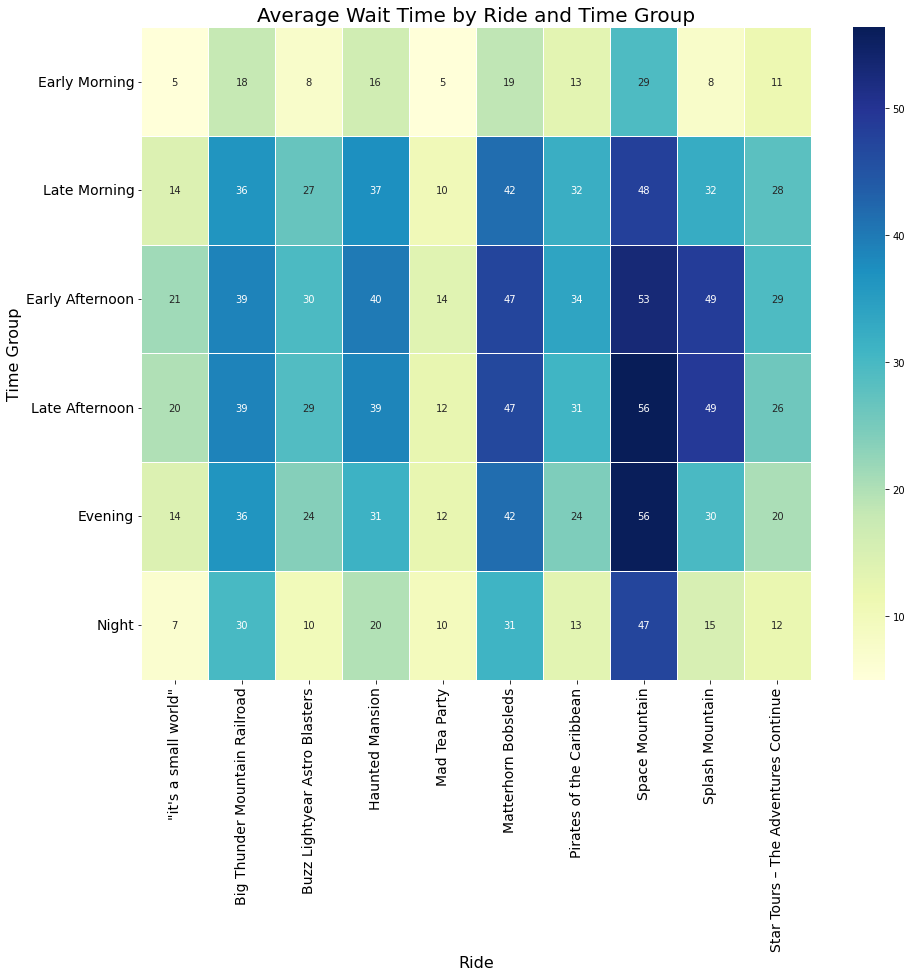

In [ ]:
# create pivot table
data4 = pd.pivot_table(agg_df, values = 'Wait.Time', index=['time group'], columns=['Ride'], aggfunc='mean')

# Plot heatmeap
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data4, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, ax=ax)


ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title('Average Wait Time by Ride and Time Group', fontsize = 20)
ax.set_xlabel('Ride', fontsize = 16)
ax.set_ylabel('Time Group', fontsize = 16)
plt.show()

The heatmap above shows the average wait time for every attraction for a specific time group.

**Top 5 attractions** that have the highest wait time includes 
- Space Mountain, 
- Splash Mountain
- Matterhorn Bobsleds and 
- Big Thunder Mountain Railroad
- Haunted Mansion

**Top 3 Time Groups** that are the most crowded includes
- Late Morning
- Early Afternoon 
- Late Aternoon

# Step 5: Finding the Optimal Routes

#### Pivot wide for aggregated dataframe

In [ ]:
# Create a pivot table
pivot_table = pd.pivot_table(agg_df, values = 'Wait.Time', index=['time group'], columns=['Ride'])

# Reset the index of the dataframe
df_pivot = pivot_table.reset_index()
df_pivot

Ride,time group,"""it's a small world""",Big Thunder Mountain Railroad,Buzz Lightyear Astro Blasters,Haunted Mansion,Mad Tea Party,Matterhorn Bobsleds,Pirates of the Caribbean,Space Mountain,Splash Mountain,Star Tours – The Adventures Continue
0,Early Morning,5.171699,17.884860,7.608673,16.365219,5.023001,18.553618,13.122922,29.354603,7.652046,11.421265
1,Late Morning,14.283388,36.457838,26.801506,37.268383,10.322973,41.604301,32.097987,48.110738,32.482149,27.914650
2,Early Afternoon,21.403927,38.838176,29.648743,39.959103,13.734927,47.167373,33.801140,52.982383,48.632331,29.335677
3,Late Afternoon,19.888773,38.873471,28.921374,38.686161,12.328007,46.830553,30.880228,56.370077,49.006341,26.070061
4,Evening,14.417553,36.317323,23.869699,31.359284,12.339770,41.536178,24.358923,56.058081,29.744671,20.324811
5,Night,6.692527,30.075637,10.172963,19.671835,9.583427,31.081492,13.271851,47.237321,15.218752,12.000685


In [ ]:
# Rename the columns of the DataFrame
df_pivot = df_pivot.rename(columns={
    "\"it's a small world\"": "Ride0",
    "Big Thunder Mountain Railroad": "Ride1", 
    "Buzz Lightyear Astro Blasters": "Ride2", 
    "Haunted Mansion": "Ride3", 
    "Mad Tea Party": "Ride4", 
    "Matterhorn Bobsleds": "Ride5", 
    "Pirates of the Caribbean": "Ride6",
    "Space Mountain": "Ride7",
    "Splash Mountain": "Ride8", 
    "Star Tours – The Adventures Continue": "Ride9"
})

# Set the index of the DataFrame to 'time group'
df = df_pivot.set_index('time group')
df

Ride,Ride0,Ride1,Ride2,Ride3,Ride4,Ride5,Ride6,Ride7,Ride8,Ride9
time group,,,,,,,,,,
Early Morning,5.171699,17.884860,7.608673,16.365219,5.023001,18.553618,13.122922,29.354603,7.652046,11.421265
Late Morning,14.283388,36.457838,26.801506,37.268383,10.322973,41.604301,32.097987,48.110738,32.482149,27.914650
Early Afternoon,21.403927,38.838176,29.648743,39.959103,13.734927,47.167373,33.801140,52.982383,48.632331,29.335677
Late Afternoon,19.888773,38.873471,28.921374,38.686161,12.328007,46.830553,30.880228,56.370077,49.006341,26.070061
Evening,14.417553,36.317323,23.869699,31.359284,12.339770,41.536178,24.358923,56.058081,29.744671,20.324811
Night,6.692527,30.075637,10.172963,19.671835,9.583427,31.081492,13.271851,47.237321,15.218752,12.000685


### Searching Optimal Route Using Algorithm that Generates Permutations

In [ ]:
# Extract the name of Ride and Time group data
rides = list(df.columns)
time_groups = list(df.index)

# Create all permutation for ride
ride_permutations = itertools.permutations(rides, len(time_groups))
valid_permutations = []

# Adding all permutations into time_group
count = 1
for perm in ride_permutations:
  time_group_dict = {time_group: set() for time_group in time_groups}
  for i in range(len(perm)):
    time_group_dict[time_groups[i]].add(perm[i])
  valid_permutations.append(time_group_dict)

In [ ]:
print(type(valid_permutations))

<class 'list'>


In [ ]:
my_list = []
for perm in valid_permutations: 
  temp = []
  for i in range(len(perm)):
    # Create an empty dictionary with 3 keys
    my_dict = dict(time=None, ride = None, wait=None)

    # Access the value from perm
    time = list(perm.keys())[i]
    ride = str(perm.get(time))
    ride = ride[2:7]
    wait_time = df.loc[time, ride]
    
    # append them into a dictionary
    my_dict['time'] = time
    my_dict['ride'] = ride
    my_dict['wait'] = wait_time

    # Append a dictionary into a list
    temp.append(my_dict)

  # Append all possible route into a list
  my_list.append(temp)

In [ ]:
all_routes = my_list[0:10]

for route in all_routes: 
  print(route)

[{'time': 'Early Morning', 'ride': 'Ride0', 'wait': 5.1716987213925005}, {'time': 'Late Morning', 'ride': 'Ride1', 'wait': 36.45783796551453}, {'time': 'Early Afternoon', 'ride': 'Ride2', 'wait': 29.648743016759777}, {'time': 'Late Afternoon', 'ride': 'Ride3', 'wait': 38.686160676171774}, {'time': 'Evening', 'ride': 'Ride4', 'wait': 12.339770095931193}, {'time': 'Night', 'ride': 'Ride5', 'wait': 31.081492212966317}]
[{'time': 'Early Morning', 'ride': 'Ride0', 'wait': 5.1716987213925005}, {'time': 'Late Morning', 'ride': 'Ride1', 'wait': 36.45783796551453}, {'time': 'Early Afternoon', 'ride': 'Ride2', 'wait': 29.648743016759777}, {'time': 'Late Afternoon', 'ride': 'Ride3', 'wait': 38.686160676171774}, {'time': 'Evening', 'ride': 'Ride4', 'wait': 12.339770095931193}, {'time': 'Night', 'ride': 'Ride6', 'wait': 13.271850604622685}]
[{'time': 'Early Morning', 'ride': 'Ride0', 'wait': 5.1716987213925005}, {'time': 'Late Morning', 'ride': 'Ride1', 'wait': 36.45783796551453}, {'time': 'Early A

### Searching the shortest 10000 routes

We discovered that generating all possible permutations is a time-consuming process; therefore, we chose to evaluate the initial 10000 shortest routes.

In [ ]:
total_wait_time = [sum(ride['wait'] for ride in route) for route in my_list] # calculate total wait time for each route
route_wait_time = list(zip(total_wait_time, range(1, len(my_list) + 1))) # create list of tuples with total wait time and route number
sorted_routes = sorted(route_wait_time, key=lambda x: x[0]) # sort routes by total wait time
top_10000_routes = sorted_routes[:10000] # get the top 10000 routes with the least total wait time

for wait_time, route_num in top_10000_routes:
  
    # Get list of ride names and time groups for the current route
    ride_names = [ride['ride'] for ride in my_list[route_num-1]]
    time_groups = [ride['time'] for ride in my_list[route_num-1]]

In [ ]:
# Create empty DataFrame
route_10000 = pd.DataFrame(columns=['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night', "Total Wait Time"])

# Loop through top 8 routes
for i, (wait_time, route_num) in enumerate(top_10000_routes):
    # Get list of ride names and time groups for the current route
    ride_names = [ride['ride'] for ride in my_list[route_num-1]]
    time_groups = [ride['time'] for ride in my_list[route_num-1]]
    
    # Create a dictionary with the ride names and time groups for the current route
    route_dict = dict(zip(time_groups, ride_names))
    route_dict["Total Wait Time"] = wait_time
    
    # Add the dictionary as a row to the DataFrame
    route_10000.loc["Route {}".format(i+1)] = route_dict

# Display the DataFrame
route_10000.tail()

,Early Morning,Late Morning,Early Afternoon,Late Afternoon,Evening,Night,Total Wait Time
Route 9996,Ride0,Ride8,Ride4,Ride9,Ride6,Ride1,131.893396
Route 9997,Ride2,Ride1,Ride0,Ride6,Ride9,Ride8,131.894229
Route 9998,Ride6,Ride4,Ride1,Ride9,Ride2,Ride3,131.895666
Route 9999,Ride2,Ride1,Ride3,Ride4,Ride9,Ride8,131.897183
Route 10000,Ride4,Ride6,Ride1,Ride2,Ride9,Ride0,131.897875


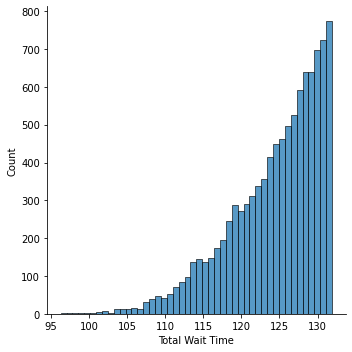

In [ ]:
# Create histogram plot
sns.displot(route_10000['Total Wait Time'], kde=False)

ax.tick_params(axis='y', labelsize=14)
ax.set_title("The Histogram of the Average Wait Time for 6 Rides in One Day", fontsize = 20)
ax.set_xlabel("The Total Average Wait Time", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.show()

The histogram shows the average wait time for 6 rides in a single day. The minimum total wait time is approximately 95 minutes, and it progressively increases beyond 130 minutes. If we were to generate all feasible permutations, we would observe a continuous rise in the total wait time.

### Searching the top 8 optimal routes

We're interested in examining 8 optimal routes because the standard guide also outlines 8 routes. Choosing this number for the sake of comparison seems the most logical.

In [ ]:
total_wait_time = [sum(ride['wait'] for ride in route) for route in my_list] # calculate total wait time for each route
route_wait_time = list(zip(total_wait_time, range(1, len(my_list) + 1))) # create list of tuples with total wait time and route number
sorted_routes = sorted(route_wait_time, key=lambda x: x[0]) # sort routes by total wait time
top_8_routes = sorted_routes[:8] # get the top 8 routes with the least total wait time

for wait_time, route_num in top_8_routes:
    #print("Route {}: Total wait time = {}".format(route_num, wait_time))
    
    # Get list of ride names and time groups for the current route
    ride_names = [ride['ride'] for ride in my_list[route_num-1]]
    time_groups = [ride['time'] for ride in my_list[route_num-1]]
    
    #print("Ride Names: {}".format(ride_names))
    #print("Time Groups: {}".format(time_groups))
    #print()

route_df = pd.DataFrame(columns=['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night', "Total Wait Time"])

# Loop through top 8 routes
for i, (wait_time, route_num) in enumerate(top_8_routes):
    # Get list of ride names and time groups for the current route
    ride_names = [ride['ride'] for ride in my_list[route_num-1]]
    time_groups = [ride['time'] for ride in my_list[route_num-1]]
    
    # Create a dictionary with the ride names and time groups for the current route
    route_dict = dict(zip(time_groups, ride_names))
    route_dict["Total Wait Time"] = wait_time
    
    # Add the dictionary as a row to the DataFrame
    route_df.loc["Route {}".format(i+1)] = route_dict

# Display the DataFrame
route_df

,Early Morning,Late Morning,Early Afternoon,Late Afternoon,Evening,Night,Total Wait Time
Route 1,Ride8,Ride0,Ride4,Ride9,Ride6,Ride2,96.272309
Route 2,Ride8,Ride0,Ride4,Ride6,Ride9,Ride2,97.048363
Route 3,Ride8,Ride0,Ride2,Ride4,Ride9,Ride6,97.508845
Route 4,Ride8,Ride0,Ride9,Ride4,Ride6,Ride2,98.131004
Route 5,Ride8,Ride0,Ride4,Ride2,Ride9,Ride6,98.188396
Route 6,Ride8,Ride0,Ride6,Ride4,Ride9,Ride2,98.562354
Route 7,Ride8,Ride0,Ride4,Ride9,Ride2,Ride6,98.881972
Route 8,Ride8,Ride4,Ride0,Ride9,Ride6,Ride2,99.980893


### Searching the top 8 conventional routes

Supposing that we are following the conventional route, the subsequent DataFrame demonstrates the mean wait time for the top 8 routes. This part was completedly almost manually. 

In [ ]:
# The order of rides based on conventional route are  
# 1: Pirate of Carribeans
# 2: Haunted Mansion
# 3: Splash Mountain
# 4: Big Thunder Mt.Railroad
# 5: Teacups, It's a Small World, Matterhorn
# 6: Space Mountain, Star Tours, Buzz Lightyear Astro Blasters

# We will populate each route manually
# Teacups and Space Mountain
c1 = [13.021830, 37.268383, 52.982383, 38.873471, 12.340294, 47.236201]
# Teacups and Star Tour 
c2 = [13.021830, 37.268383, 52.982383, 38.873471, 12.340294, 12.000286]
# Teacups and Buzz Lightyear 
c3 = [13.021830, 37.268383, 52.982383, 38.873471, 12.340294, 10.172963]

# It's a Small World and Space Mountain
c4 = [13.021830, 37.268383, 52.982383, 38.873471, 14.417553, 47.236201]
# It's a Small World and Star Tour 
c5 = [13.021830, 37.268383, 52.982383, 38.873471, 14.417553, 12.000286]
# It's a Small World and Buzz Lightyear 
c6 = [13.021830, 37.268383, 52.982383, 38.873471, 14.417553, 10.172963]

# It's a Small World and Space Mountain
c7 = [13.021830, 37.268383, 52.982383, 38.873471, 41.535503, 47.236201]
# It's a Small World and Star Tour 
c8 = [13.021830, 37.268383, 52.982383, 38.873471, 41.535503, 12.000286]
# It's a Small World and Buzz Lightyear 
c9 = [13.021830, 37.268383, 52.982383, 38.873471, 41.535503, 10.172963]

data_list = [c1, c2, c3, c4, c5, c6, c7, c8, c9]

# Create 9 possible combinations of attraction where each cell is the average waiting time
old_route = pd.DataFrame(data_list)
labels = ['Early Morning', 'Late Morning', 'Early Afternoon', 'Late Afternoon', 'Evening', 'Night']
old_route = old_route.set_axis(labels, axis = 1)
old_route['Total Wait Time'] = old_route.sum(axis = 1)
old_route

,Early Morning,Late Morning,Early Afternoon,Late Afternoon,Evening,Night,Total Wait Time
0,13.02183,37.268383,52.982383,38.873471,12.340294,47.236201,201.722562
1,13.02183,37.268383,52.982383,38.873471,12.340294,12.000286,166.486647
2,13.02183,37.268383,52.982383,38.873471,12.340294,10.172963,164.659324
3,13.02183,37.268383,52.982383,38.873471,14.417553,47.236201,203.799821
4,13.02183,37.268383,52.982383,38.873471,14.417553,12.000286,168.563906
5,13.02183,37.268383,52.982383,38.873471,14.417553,10.172963,166.736583
6,13.02183,37.268383,52.982383,38.873471,41.535503,47.236201,230.917771
7,13.02183,37.268383,52.982383,38.873471,41.535503,12.000286,195.681856
8,13.02183,37.268383,52.982383,38.873471,41.535503,10.172963,193.854533


# Step 6: Statistical Analysis: 
### Compare the top 8 optimized routes to the 8 conventional route using T-test

- Ho: $\bar{x}_{Optimal} = \bar{x}_{Conventional}$
- Ha: $\bar{x}_{Optimal} < \bar{x}_{Conventional}$

In [ ]:
# compare route_df vs old_route on "Total Wait Time" by T.test
from scipy.stats import ttest_ind
import pandas as pd

route_wait_times = route_df['Total Wait Time']
old_wait_times = old_route['Total Wait Time']

t_stat, p_value = ttest_ind(route_wait_times, old_wait_times, equal_var=True)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
# divide by 2 for one-sided test 
print("P-Value: ", p_value/2)


T-statistic: -11.040
P-Value:  6.697397921280052e-09


Since p_value < 0.05, we **reject the null hypothesis**. There is a significant difference between the mean total wait time of the optimal routes and the conventional routes. Therefore, we can conclude that the new Disney planning guide reduces the wait times compared to the conventional guide.


# Step 7: Route Recommendations

Since we have 8 optimized routes, how do we recommend which route is the best?  Consider to the distance, we eyeball on the Disnyland Map, suggesting route 2, 3, 5, 7 are the optimal route since they not only have less total waiting time, but also reasonable on directions.

Route 1: 3-6-5-9-1-10

**Route 2: 3-6-5-1-9-10**

**Route 3: 3-6-10-5-9-1**

Route 4: 3-6-9-5-1-10

**Route 5: 3-6-5-10-11-1**

Route 6: 3-6-1-5-9-10

**Route 7: 3-6-5-9-10-1**

Route 8: 3-5-6-9-1-10

In [ ]:
# Rename the values
route_df['Early Morning'] = route_df['Early Morning'].replace({'Ride8': 'Splash Mountain'})
route_df['Late Morning'] = route_df['Late Morning'].replace({'Ride0': 'Its a Small World', 'Ride4': 'Mad Tea Party', 'C': 'cherry'})
route_df['Early Afternoon'] = route_df['Early Afternoon'].replace({'Ride0': 'Its a Small World', 'Ride2': 'Buzz Lightyear Astro Blasters', 'Ride4': 'Mad Tea Party', 'Ride6': 'Pirates of the Caribbean', 'Ride9': 'Star Tours – The Adventures Continue'})
route_df['Late Afternoon'] = route_df['Late Afternoon'].replace({'Ride2': 'Buzz Lightyear Astro Blasters', 'Ride4': 'Mad Tea Party', 'Ride6': 'Pirates of the Caribbean', 'Ride9': 'Star Tours – The Adventures Continue'})
route_df['Evening'] = route_df['Evening'].replace({'Ride2': 'Buzz Lightyear Astro Blasters', 'Ride6': 'Pirates of the Caribbean', 'Ride9': 'Star Tours – The Adventures Continue'})
route_df['Night'] = route_df['Night'].replace({'Ride2': 'Buzz Lightyear Astro Blasters', 'Ride6': 'Pirates of the Caribbean'})

route_df

,Early Morning,Late Morning,Early Afternoon,Late Afternoon,Evening,Night,Total Wait Time
Route 1,Splash Mountain,Its a Small World,Mad Tea Party,Star Tours – The Adventures Continue,Pirates of the Caribbean,Buzz Lightyear Astro Blasters,96.272309
Route 2,Splash Mountain,Its a Small World,Mad Tea Party,Pirates of the Caribbean,Star Tours – The Adventures Continue,Buzz Lightyear Astro Blasters,97.048363
Route 3,Splash Mountain,Its a Small World,Buzz Lightyear Astro Blasters,Mad Tea Party,Star Tours – The Adventures Continue,Pirates of the Caribbean,97.508845
Route 4,Splash Mountain,Its a Small World,Star Tours – The Adventures Continue,Mad Tea Party,Pirates of the Caribbean,Buzz Lightyear Astro Blasters,98.131004
Route 5,Splash Mountain,Its a Small World,Mad Tea Party,Buzz Lightyear Astro Blasters,Star Tours – The Adventures Continue,Pirates of the Caribbean,98.188396
Route 6,Splash Mountain,Its a Small World,Pirates of the Caribbean,Mad Tea Party,Star Tours – The Adventures Continue,Buzz Lightyear Astro Blasters,98.562354
Route 7,Splash Mountain,Its a Small World,Mad Tea Party,Star Tours – The Adventures Continue,Buzz Lightyear Astro Blasters,Pirates of the Caribbean,98.881972
Route 8,Splash Mountain,Mad Tea Party,Its a Small World,Star Tours – The Adventures Continue,Pirates of the Caribbean,Buzz Lightyear Astro Blasters,99.980893


Saving Optimal route 2 demo.jpg to Optimal route 2 demo.jpg


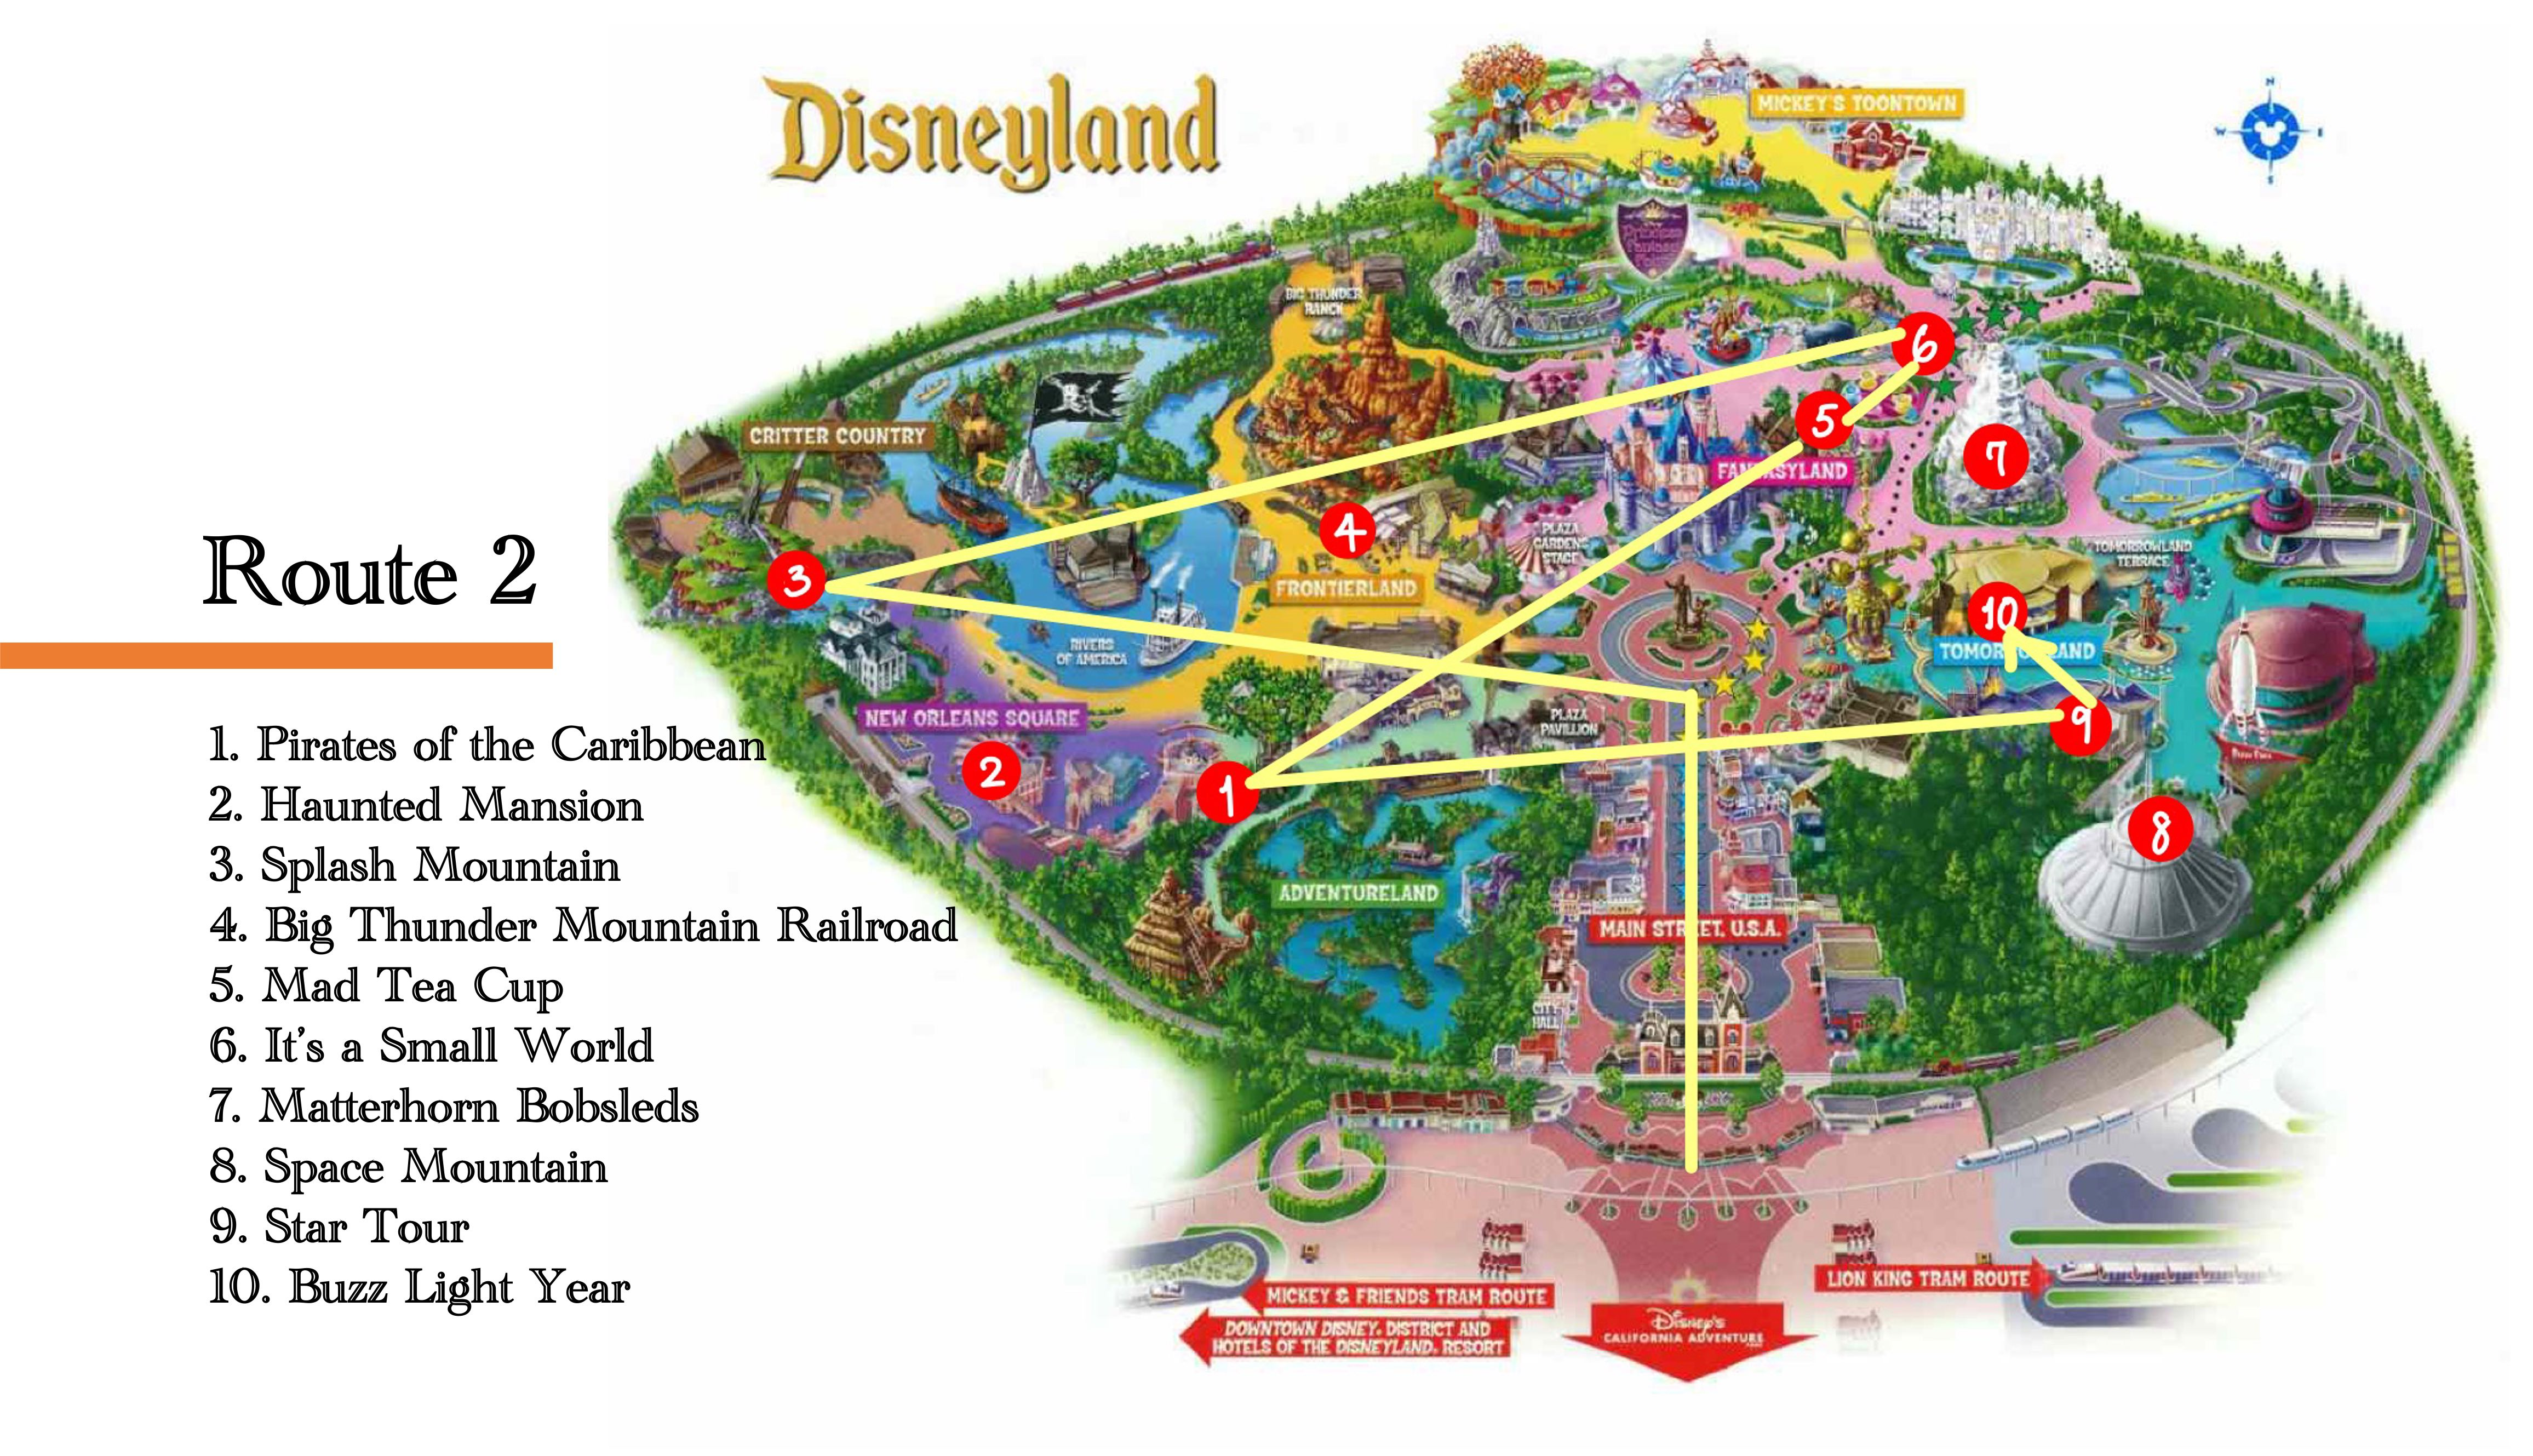

In [ ]:
# Demo for optimal Route 2
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('Optimal route 2 demo.jpg')

In [ ]:
# Calculate the average wait time for 8 conventional routes
mean_old_route = round(old_wait_times.mean(),2)
# Calculate the average wait time for 8 optimal routes
mean_new_route = round(route_wait_times.mean(),2)
diff = round(mean_old_route - mean_new_route, 2)

print("The average wait time from 8 conventional routes ", mean_old_route, "minutes.")
print("The average wait time from 8 optimal routes ", mean_new_route, "minutes.")
print("------------------------------------------ ")
print("The average difference between the two", diff, "minutes.")

The average wait time from 8 conventional routes  188.05 minutes.
The average wait time from 8 optimal routes  98.07 minutes.
------------------------------------------ 
The average difference between the two 89.98000000000002 minutes.


Overall, the new Disney plan can reduce wait time up to 90.4 minutes compared to conventional guide. That would save visitor at least 1.5 hours on average.

# Step 8: Conclusion

The analysis has yielded interesting results as optimal routes for a one day trip at Disneyland do exist under the assumption that there will visit at least 6 different popular attractions from different land. This certainly supports our initial hypothesis that a new Disney planninng can reduce the average wait time compared to the conventional guide. By following these optimal routes, visitors can potentially avoid crowds and save an average of 1.5 hours, which can be spent on other attractions. However, it's important to note that while we found a significant difference in wait times, there are other factors that can also affect these routes, including but not limited to seasonality, day of the week, holidays, weather, special events.

Overall, this analysis is beneficial for visitors who care more about the number of attractions they can see rather than choosing their favorite ones on a typical day.  